#Text Analytics | Assignment 3

**Submitted by:**

Spyros Mastrodimitris Gounaropoulos

Panagiota Tavoularea 

Panagiotis Antoniozas 





##Downloading, Importing & Understanding our Data Set

In [ ]:
!wget http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
!tar xvzf review_polarity.tar.gz

from sklearn.datasets import load_files  

#download the files
movies = load_files(container_path="txt_sentoken", encoding="utf-8")
 
#save the reviews and the annotations to x, y respectively 
x, y = movies.data, movies.target

--2023-03-02 15:33:19--  http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz
Resolving www.cs.cornell.edu (www.cs.cornell.edu)... 132.236.207.36
Connecting to www.cs.cornell.edu (www.cs.cornell.edu)|132.236.207.36|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3127238 (3.0M) [application/x-gzip]
Saving to: ‘review_polarity.tar.gz.2’

review_polarity.tar 100%[===================>]   2.98M  4.95MB/s    in 0.6s    

2023-03-02 15:33:20 (4.95 MB/s) - ‘review_polarity.tar.gz.2’ saved [3127238/3127238]

txt_sentoken/neg/cv000_29416.txt
txt_sentoken/neg/cv001_19502.txt
txt_sentoken/neg/cv002_17424.txt
txt_sentoken/neg/cv003_12683.txt
txt_sentoken/neg/cv004_12641.txt
txt_sentoken/neg/cv005_29357.txt
txt_sentoken/neg/cv006_17022.txt
txt_sentoken/neg/cv007_4992.txt
txt_sentoken/neg/cv008_29326.txt
txt_sentoken/neg/cv009_29417.txt
txt_sentoken/neg/cv010_29063.txt
txt_sentoken/neg/cv011_13044.txt
txt_sentoken/neg/cv012_29411.txt
txt_sentoken/neg

>Finding the Boolean Number for each Category

In [ ]:
#print the target names and the number of reviews
print("(y=0) corresptonds to -->",movies.target_names[0])
print("(y=1) corresptonds to-->",movies.target_names[1])

(y=0) corresptonds to --> neg
(y=1) corresptonds to--> pos


>Printing a Review

In [ ]:
# First sample and target
print('Sample: {} \nTarget: {}'.format(x[0], y[0]))

Sample: arnold schwarzenegger has been an icon for action enthusiasts , since the late 80's , but lately his films have been very sloppy and the one-liners are getting worse . 
it's hard seeing arnold as mr . freeze in batman and robin , especially when he says tons of ice jokes , but hey he got 15 million , what's it matter to him ? 
once again arnold has signed to do another expensive blockbuster , that can't compare with the likes of the terminator series , true lies and even eraser . 
in this so called dark thriller , the devil ( gabriel byrne ) has come upon earth , to impregnate a woman ( robin tunney ) which happens every 1000 years , and basically destroy the world , but apparently god has chosen one man , and that one man is jericho cane ( arnold himself ) . 
with the help of a trusty sidekick ( kevin pollack ) , they will stop at nothing to let the devil take over the world ! 
parts of this are actually so absurd , that they would fit right in with dogma . 
yes , the film is 




##  Preprocess Dataset

>Preprocess the Dataset

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
import re
from nltk.stem import WordNetLemmatizer

stemmer = WordNetLemmatizer()
docs = []

for doc in x: 
    
    # Remove non-word (special) characters such as punctuation. etc
    document = re.sub(r'\W', ' ', str(doc))

    # Remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
  
    #Remove all digits
    document = re.sub(" \d+", " ", document)

    # Substitute multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)

    # Convert to Lowercase
    document = document.lower()

    # Split the document based on whitespaces (--> List of words)
    document = document.split()
    
    # Lemmatization
    document = [stemmer.lemmatize(word) for word in document]
    
    # Reconstruct the document by joining the words on each whitespace
    document = ' '.join(document)

    # Append all documents into a list 'docs'
    docs.append(document)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


>Print a Review, Before and After Data Preprocessing

In [ ]:
from pprint import pprint

print("\nOriginal review text:\n")
pprint(format(x[0]))
print("\nFiltered review text:\n")
pprint(format(docs[0]))
print("\nLabel:\n", y[0])


Original review text:

('arnold schwarzenegger has been an icon for action enthusiasts , since the '
 "late 80's , but lately his films have been very sloppy and the one-liners "
 'are getting worse . \n'
 "it's hard seeing arnold as mr . freeze in batman and robin , especially when "
 "he says tons of ice jokes , but hey he got 15 million , what's it matter to "
 'him ? \n'
 'once again arnold has signed to do another expensive blockbuster , that '
 "can't compare with the likes of the terminator series , true lies and even "
 'eraser . \n'
 'in this so called dark thriller , the devil ( gabriel byrne ) has come upon '
 'earth , to impregnate a woman ( robin tunney ) which happens every 1000 '
 'years , and basically destroy the world , but apparently god has chosen one '
 'man , and that one man is jericho cane ( arnold himself ) . \n'
 'with the help of a trusty sidekick ( kevin pollack ) , they will stop at '
 'nothing to let the devil take over the world ! \n'
 'parts of this are

>Calculation of the Average Number of Words per Review

In [ ]:
#a for loop that creates a list named words that contains the number of words for each review 
words=[]
for doc in docs:
  words_list = doc.split()
  words.append(len(words_list))

#print a sample
print("A sample:",words[1:5])

A sample: [527, 304, 337, 117]


In [ ]:
#a for loop that helps us to calculate the following:

#Number of Positive Reviews
#Number of Negative Reviews
#Average Number of Words per Review
#Average Number of Words per Positive Review
#Average Number of Words per Negative Review
#The Number of Total Reviews

tot=0
s=0
s1=0
s2=0
pos=0
neg=0

for i in range(len(docs)):
  tot+=words[i]
  s+=1
  if y[i]==0:
    neg+=words[i]
    s1+=1
  else:
    pos+=words[i]
    s2+=1

#print the results
print("Number of Positive Reviews:",s1)
print("Number of Negative Reviews:",s2)
print("")
print("Average Number of Words per Review:",round(tot/s))
print("Average Number of Words per Positive Review:",round(pos/s2))
print("Average Number of Words per Negative Review:",round(neg/s1))
print("")
print("The Number of Total Reviews:",len(x))

Number of Positive Reviews: 1000
Number of Negative Reviews: 1000

Average Number of Words per Review: 629
Average Number of Words per Positive Review: 665
Average Number of Words per Negative Review: 593

The Number of Total Reviews: 2000


>Calculation of the Average Number of Characters per Review

In [ ]:
#a for loop that helps us to calculate the following:

#Number of Positive Reviews
#Number of Negative Reviews
#Average Number of Characters per Review
#Average Number of Characters per Positive Review
#Average Number of Characters per Negative Review
#The Number of Total Reviews

s=0
s1=0
s2=0
pos=0
neg=0
for i in range(len(x)):
  s+=len(x[i])
  if y[i]==0:
    pos+=1
    s1+=len(x[i])
  if y[i]==1:
    neg+=1
    s2+=len(x[i])

print("Number of Positive Reviews:",pos)
print("Number of Negative Reviews:",neg)
print("")
print("Average Number of Characters per Review:",round(s/len(x)))
print("Average Number of Characters per Positive Review:",round(s1/pos))
print("Average Number of Characters per Negative Review:",round(s2/neg))
print("")
print("The Number of Total Reviews:",len(x))

Number of Positive Reviews: 1000
Number of Negative Reviews: 1000

Average Number of Characters per Review: 3893
Average Number of Characters per Positive Review: 3662
Average Number of Characters per Negative Review: 4124

The Number of Total Reviews: 2000


##Split The Data to Train, Test and Dev

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

# split the sentences to train, test, dev
xtrain,xtest,ytrain,ytest=train_test_split(docs,y, train_size=0.7,random_state=40)
xtrain,xdev,ytrain,ydev=train_test_split(xtrain,ytrain, train_size=0.7,random_state=40)

#show the reviews per data set
print("Number of Reviews in Train Set:",len(xtrain))
print("Number of Reviews in Test Set:",len(xtest))
print("Number of Reviews in Dev Set:",len(xdev))

Number of Reviews in Train Set: 979
Number of Reviews in Test Set: 600
Number of Reviews in Dev Set: 421


>Visualization of the Reviews Frequencies per Class Per Data Set

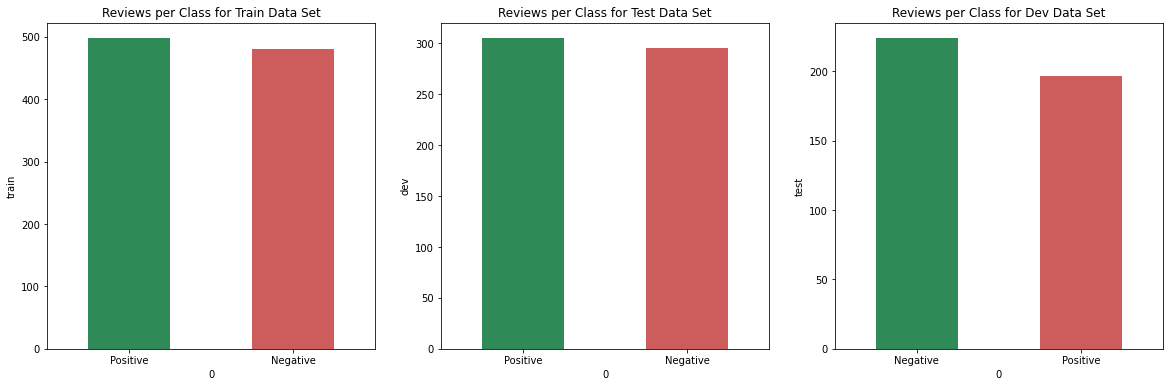

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

#convert data to dataframes
ytrain_for_plot = pd.DataFrame (ytrain)
ytest_for_plot = pd.DataFrame (ytest)
ydev_for_plot = pd.DataFrame (ydev)

#change dimentions  of the plot
fig, axs = plt.subplots(1, 3,figsize=(20,6))

#create the bar plots
tr = ytrain_for_plot.value_counts().plot(kind="bar", color=["seagreen", "indianred"], ylabel="train", ax=axs[0])
te = ytest_for_plot.value_counts().plot(kind="bar", color=["seagreen", "indianred"], ylabel="dev", ax=axs[1])
de = ydev_for_plot.value_counts().plot(kind="bar", color=["seagreen", "indianred"], ylabel="test", ax=axs[2])

#set the titles
tr.set_title("Reviews per Class for Train Data Set")
te.set_title("Reviews per Class for Test Data Set")
de.set_title("Reviews per Class for Dev Data Set")

#set the "x" labels
tr.set_xticklabels(['Positive', 'Negative'],rotation=0)
te.set_xticklabels(['Positive', 'Negative'],rotation=0)
de.set_xticklabels(['Negative', 'Positive'],rotation=0)

plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')

fig.show()

## TF-IDF n-gram Features Creation

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Exclude stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords

# Use unigram & bi-gram tf*idf features
vectorizer = TfidfVectorizer(
    ngram_range = (1, 2), # unigrams and bigrams
    max_features = 5000, # we keep only the words that have TF<=threshold,
    sublinear_tf = True, # instead of TF/IDF --> (1+ log(TF))/IDF, 
    stop_words = stopwords.words('english')) # ignore english stopwords (the, is, and)

# Fit Vectorizer on train data
# Transform on all data (train - test - dev)
xtrain_tfidf = vectorizer.fit_transform(xtrain)
xtest_tfidf = vectorizer.transform(xtest)
xdev_tfidf = vectorizer.transform(xdev)

#print for each data set it's reviews and features
print("")
print("Each data set reviews and features:")
print("")
print('Shape of Training Data: {}'.format(xtrain_tfidf.shape))
print('Shape of Test Data: {}'.format(xtest_tfidf.shape))
print('Shape of Dev Data: {}\n'.format(xdev_tfidf.shape))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Each data set reviews and features:

Shape of Training Data: (979, 5000)
Shape of Test Data: (600, 5000)
Shape of Dev Data: (421, 5000)



## Feature Selection

>Now we will use the SVD Method to reduce our features 

In [ ]:
# Reduce dimensionality using svd 5000 --> 1000
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=1000, random_state=40)
xtrain_tfidf_svd1 = svd.fit_transform(xtrain_tfidf)
xdev_tfidf_svd1 = svd.transform(xdev_tfidf)
xtest_tfidf_svd1 = svd.transform(xtest_tfidf)

##Baseline Model

In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import f1_score
import pandas as pd
import time
import numpy as np

# Train
baseline = DummyClassifier(strategy='most_frequent',random_state=40)
start_time = time.time()
baseline.fit(xtrain_tfidf_svd1, ytrain)

#print the time passed
print("Training took: {} seconds \n".format(time.time() - start_time))

Training took: 0.00046062469482421875 seconds 



>Confusion Matrix for Train Set

Train f1-score: 67.43%
Confusion Matrix for train data:


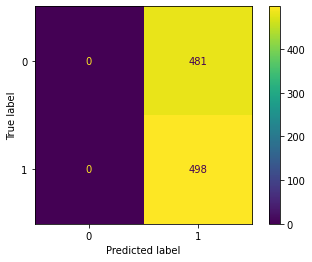

In [ ]:
predictions = baseline.predict(xtrain_tfidf_svd1)
score = f1_score(ytrain,predictions)

#print f1 score
print("Train f1-score: {:.2f}%".format(score*100))

#print the confusion matrix
print("Confusion Matrix for train data:")
ConfusionMatrixDisplay.from_estimator(baseline, xtrain_tfidf_svd1, ytrain, values_format = '.0f')

>Confusion Matrix for Test Set

Test f1-score: 67.40% 

Confusion Matrix for test data:


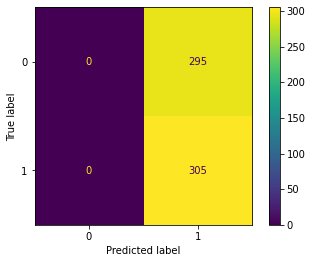

In [ ]:
predictions_test = baseline.predict(xtest_tfidf_svd1)
score = f1_score(ytest, predictions_test)

#print f1 score
print("Test f1-score: {:.2f}% \n".format(score*100))

#print the confusion matrix
print("Confusion Matrix for test data:")
ConfusionMatrixDisplay.from_estimator(baseline, xtest_tfidf_svd1, ytest, values_format = '.0f')

>Confusion Matrix for Dev Set

Dev f1-score: 63.75% 

Confusion Matrix for dev data:


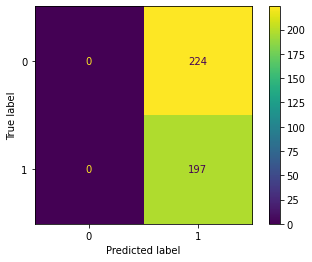

In [ ]:
predictions_dev = baseline.predict(xdev_tfidf_svd1)
score = f1_score(ydev,predictions_dev)

#print f1 score
print("Dev f1-score: {:.2f}% \n".format(score*100))

#print the confusion matrix
print("Confusion Matrix for dev data:")
ConfusionMatrixDisplay.from_estimator(baseline, xdev_tfidf_svd1, ydev, values_format = '.0f')

>Classification Reports for all the Data Sets

In [ ]:
from sklearn import metrics

# print the classifiation reports
print("Classification Report for Train Set: \n",metrics.classification_report(ytrain,predictions))
print("----------------------------------------------------------------------")
print("\n\nClassification Report for Test Set: \n",metrics.classification_report(ytest,predictions_test))
print("----------------------------------------------------------------------")
print("\n\nClassification Report for Dev Set: \n",metrics.classification_report(ydev,predictions_dev))

Classification Report for Train Set: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       481
           1       0.51      1.00      0.67       498

    accuracy                           0.51       979
   macro avg       0.25      0.50      0.34       979
weighted avg       0.26      0.51      0.34       979

----------------------------------------------------------------------


Classification Report for Test Set: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       295
           1       0.51      1.00      0.67       305

    accuracy                           0.51       600
   macro avg       0.25      0.50      0.34       600
weighted avg       0.26      0.51      0.34       600

----------------------------------------------------------------------


Classification Report for Dev Set: 
               precision    recall  f1-score   support

           0       0.00      0.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

>Presision-Recall AUC Score (per Class and per Data Set) and Average Presision-Recall AUC Score Calculation (per Data Set)

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

#for train set
pred_train = baseline.predict_proba(xtrain_tfidf_svd1)
precision, recall, thresholds = precision_recall_curve(ytrain, pred_train[:,0],pos_label=0)
auc_train_neg = auc(recall, precision)
precision, recall, thresholds = precision_recall_curve(ytrain, pred_train[:,1],pos_label=1)
auc_train_pos = auc(recall, precision)
auc_train=(auc_train_neg+auc_train_pos)/2

print("(Train Set): Presision-Recall AUC Score for the Negative Class is:",auc_train_neg)
print("(Train Set): Presision-Recall AUC Score for the Positive Class is:",auc_train_pos)
print("(Train Set): Average Presision-Recall AUC Score is:",auc_train)


#for test set
pred_test = baseline.predict_proba(xtest_tfidf_svd1)
precision, recall, thresholds = precision_recall_curve(ytest, pred_test[:,0],pos_label=0)
auc_test_neg = auc(recall, precision)
precision, recall, thresholds = precision_recall_curve(ytest, pred_test[:,1],pos_label=1)
auc_test_pos = auc(recall, precision)
auc_test=(auc_test_neg+auc_test_pos)/2
print("")
print("(Test Set): Presision-Recall AUC Score for the Negative Class is:",auc_test_neg)
print("(Test Set): Presision-Recall AUC Score for the Positive Class is:",auc_test_pos)
print("(Test Set): Average Presision-Recall AUC Score is:",auc_test)


#for dev set
pred_dev = baseline.predict_proba(xdev_tfidf_svd1)
precision, recall, thresholds = precision_recall_curve(ydev, pred_dev[:,0],pos_label=0)
auc_dev_neg = auc(recall, precision)
precision, recall, thresholds = precision_recall_curve(ydev, pred_dev[:,1],pos_label=1)
auc_dev_pos = auc(recall, precision)
auc_dev=(auc_dev_neg+auc_dev_pos)/2
print("")
print("(Dev Set): Presision-Recall AUC Score for the Negative Class is:",auc_dev_neg)
print("(Dev Set): Presision-Recall AUC Score for the Positive Class is:",auc_dev_pos)
print("(Dev Set): Average Presision-Recall AUC Score is:",auc_dev)

(Train Set): Presision-Recall AUC Score for the Negative Class is: 0.7456588355464759
(Train Set): Presision-Recall AUC Score for the Positive Class is: 0.7543411644535241
(Train Set): Average Presision-Recall AUC Score is: 0.75

(Test Set): Presision-Recall AUC Score for the Negative Class is: 0.7458333333333333
(Test Set): Presision-Recall AUC Score for the Positive Class is: 0.7541666666666667
(Test Set): Average Presision-Recall AUC Score is: 0.75

(Dev Set): Presision-Recall AUC Score for the Negative Class is: 0.7660332541567696
(Dev Set): Presision-Recall AUC Score for the Positive Class is: 0.7339667458432304
(Dev Set): Average Presision-Recall AUC Score is: 0.75


##Logistic Regression

>Logistic Regression Model Implemetation

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train
clf = LogisticRegression(solver='lbfgs',C=1,max_iter=10,l1_ratio=0.1,random_state=40)
start_time = time.time()
clf.fit(xtrain_tfidf_svd1, ytrain)

#print the time passed
print("Training took: {} seconds \n".format(time.time() - start_time))

Training took: 0.026945114135742188 seconds 



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:1476: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


>Confusion Matrix for Train Set

Train f1-score: 98.21%

Confusion Matrix for train data:


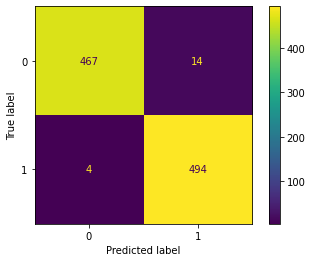

In [ ]:
# Evaluate
predictions = clf.predict(xtrain_tfidf_svd1)
score = f1_score(ytrain,predictions)

#print f1 score
print("Train f1-score: {:.2f}%".format(score*100))

#print the confusion matrix
print("\nConfusion Matrix for train data:")
ConfusionMatrixDisplay.from_estimator(clf, xtrain_tfidf_svd1, ytrain, values_format = '.0f')

>Confusion Matrix for Test Set

Test f1-score: 85.26% 

Confusion Matrix for test data:


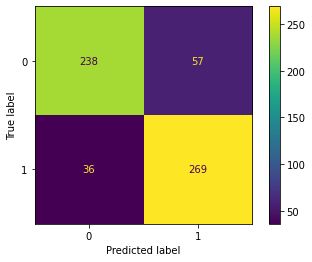

In [ ]:
predictions_test = clf.predict(xtest_tfidf_svd1)
score = f1_score(ytest, predictions_test)

#print f1 score
print("Test f1-score: {:.2f}% \n".format(score*100))

#print the confusion matrix
print("Confusion Matrix for test data:")
ConfusionMatrixDisplay.from_estimator(clf, xtest_tfidf_svd1, ytest, values_format = '.0f')

>Confusion Matrix for Dev Set

Dev f1-score: 83.95% 

Confusion Matrix for dev data:


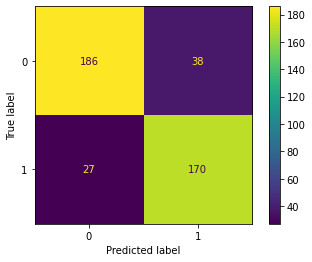

In [ ]:
predictions_dev = clf.predict(xdev_tfidf_svd1)
score = f1_score(ydev,predictions_dev)

#print f1 score
print("Dev f1-score: {:.2f}% \n".format(score*100))

#print the confusion matrix
print("Confusion Matrix for dev data:")
ConfusionMatrixDisplay.from_estimator(clf, xdev_tfidf_svd1, ydev, values_format = '.0f')

>Classification Report per Data Set

In [ ]:
# print the classifiation reports
print("Classification Report for Train Set: \n",metrics.classification_report(ytrain,predictions))
print("----------------------------------------------------------------------")
print("\n\nClassification Report for Test Set: \n",metrics.classification_report(ytest,predictions_test))
print("----------------------------------------------------------------------")
print("\n\nClassification Report for Dev Set: \n",metrics.classification_report(ydev,predictions_dev))

Classification Report for Train Set: 
               precision    recall  f1-score   support

           0       0.99      0.97      0.98       481
           1       0.97      0.99      0.98       498

    accuracy                           0.98       979
   macro avg       0.98      0.98      0.98       979
weighted avg       0.98      0.98      0.98       979

----------------------------------------------------------------------


Classification Report for Test Set: 
               precision    recall  f1-score   support

           0       0.87      0.81      0.84       295
           1       0.83      0.88      0.85       305

    accuracy                           0.84       600
   macro avg       0.85      0.84      0.84       600
weighted avg       0.85      0.84      0.84       600

----------------------------------------------------------------------


Classification Report for Dev Set: 
               precision    recall  f1-score   support

           0       0.87      0.

>Presision-Recall AUC Score (per Class and per Data Set) and Average Presision-Recall AUC Score Calculation (per Data Set)

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc


#for train set
pred_train = clf.predict_proba(xtrain_tfidf_svd1)
precision, recall, thresholds = precision_recall_curve(ytrain, pred_train[:,0],pos_label=0)
auc_train_neg = auc(recall, precision)

precision, recall, thresholds = precision_recall_curve(ytrain, pred_train[:,1],pos_label=1)
auc_train_pos = auc(recall, precision)
auc_train=(auc_train_neg+auc_train_pos)/2

print("(Train Set): Presision-Recall AUC Score for the Negative Class is:",auc_train_neg)
print("(Train Set): Presision-Recall AUC Score for the Positive Class is:",auc_train_pos)
print("(Train Set): Average Presision-Recall AUC Score is:",auc_train)


#for test set
pred_test = clf.predict_proba(xtest_tfidf_svd1)
precision, recall, thresholds = precision_recall_curve(ytest, pred_test[:,0],pos_label=0)
auc_test_neg = auc(recall, precision)

precision, recall, thresholds = precision_recall_curve(ytest, pred_test[:,1],pos_label=1)
auc_test_pos = auc(recall, precision)
auc_test=(auc_test_neg+auc_test_pos)/2

print("")
print("(Test Set): Presision-Recall AUC Score for the Negative Class is:",auc_test_neg)
print("(Test Set): Presision-Recall AUC Score for the Positive Class is:",auc_test_pos)
print("(Test Set): Average Presision-Recall AUC Score is:",auc_test)


#for dev set
pred_dev = clf.predict_proba(xdev_tfidf_svd1)
precision, recall, thresholds = precision_recall_curve(ydev, pred_dev[:,0],pos_label=0)
auc_dev_neg = auc(recall, precision)

precision, recall, thresholds = precision_recall_curve(ydev, pred_dev[:,1],pos_label=1)
auc_dev_pos = auc(recall, precision)
auc_dev=(auc_dev_neg+auc_dev_pos)/2

print("")
print("(Dev Set): Presision-Recall AUC Score for the Negative Class is:",auc_dev_neg)
print("(Dev Set): Presision-Recall AUC Score for the Positive Class is:",auc_dev_pos)
print("(Dev Set): Average Presision-Recall AUC Score is:",auc_dev)


(Train Set): Presision-Recall AUC Score for the Negative Class is: 0.9983315437368695
(Train Set): Presision-Recall AUC Score for the Positive Class is: 0.9986340238813857
(Train Set): Average Presision-Recall AUC Score is: 0.9984827838091276

(Test Set): Presision-Recall AUC Score for the Negative Class is: 0.9256098728103688
(Test Set): Presision-Recall AUC Score for the Positive Class is: 0.9359910283125624
(Test Set): Average Presision-Recall AUC Score is: 0.9308004505614655

(Dev Set): Presision-Recall AUC Score for the Negative Class is: 0.9381682228765827
(Dev Set): Presision-Recall AUC Score for the Positive Class is: 0.9221404358339274
(Dev Set): Average Presision-Recall AUC Score is: 0.930154329355255


##MLP

In [ ]:
!pip install -U keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


>Reduction of the Features to 150

In [ ]:
# Reduce dimensionality using svd 5000 --> 150
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=150, random_state=40)
xtrain_tfidf_svd1 = svd.fit_transform(xtrain_tfidf)
xdev_tfidf_svd1 = svd.transform(xdev_tfidf)
xtest_tfidf_svd1 = svd.transform(xtest_tfidf)

In [ ]:
from kerastuner import HyperParameters
import tensorflow as tf
from sklearn.metrics import f1_score, recall_score, precision_score
import numpy as np
import os


def model_builder(hp):
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Dense(units=hp.Int('input layer perceptrons', min_value=32, max_value=512, step=32), input_dim=xtrain_tfidf_svd1.shape[1],activation=hp.Choice("input layer activation function", ['relu', 'sigmoid',"tanh","softmax"])))
  for i in range(hp.Int('layers', 1, 3, 1)):                                                   
    model.add(tf.keras.layers.Dense(hp.Choice('layer' + str(i) + "perceptrons", [32,256,512]),activation=hp.Choice('activation function' + str(i), ['relu', 'sigmoid',"tanh","softmax"])))
    if hp.Boolean("dropout"+str(i)):
       model.add(tf.keras.layers.Dropout(hp.Choice('dropout value'+str(i), [0.2, 0.5]))) #0.8
  
  model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

  # Tune the learning rate for the optimizer
  # Choose an optimal value from 0.01, 0.001, or 0.0001
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-3,1e-4]) #1e-2

  model.compile(loss="binary_crossentropy", #multiclass classification problem
                  optimizer=tf.keras.optimizers.Adam(learning_rate=hp_learning_rate),metrics=['accuracy'])
  return model

<ipython-input-27-c09d18a6a23c>:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperParameters


In [ ]:
import keras_tuner as kt

tuner = kt.RandomSearch(model_builder,
                        objective='val_accuracy',
                        max_trials=100,
                        directory='my_dir',
                        project_name='intro_to_kt',seed = 40, overwrite = True)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5)

In [ ]:
tuner.search(xtrain_tfidf_svd1, ytrain, epochs=100,callbacks=[early_stopping],validation_data=(xdev_tfidf_svd1,ydev))
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]

Trial 100 Complete [00h 00m 03s]
val_accuracy: 0.523809552192688

Best val_accuracy So Far: 0.8639456033706665
Total elapsed time: 00h 08m 12s


In [ ]:
tuner.results_summary(1)

Results summary
Results in my_dir/intro_to_kt
Showing 1 best trials
Trial summary
Hyperparameters:
input layer perceptrons: 512
input layer activation function: tanh
layers: 1
layer0perceptrons: 512
activation function0: relu
dropout0: True
learning_rate: 0.0001
layer1perceptrons: 256
activation function1: relu
dropout1: False
dropout value0: 0.2
dropout value1: 0.2
layer2perceptrons: 256
activation function2: sigmoid
dropout2: True
dropout value2: 0.2
Score: 0.8639456033706665


>Building the Optimal Model

Batch size 12

In [ ]:
model = tuner.hypermodel.build(best_hps)
#print(model.summary())
checkpoint = tf.keras.callbacks.ModelCheckpoint('bestweights.hdf5',
                                                monitor='val_accuracy', 
                                                mode='max', 
                                                verbose=2, 
                                                save_best_only=True, 
                                                save_weights_only=True)



history = model.fit(xtrain_tfidf_svd1, ytrain, epochs=100, validation_split=0.3,batch_size=12,callbacks=[early_stopping,checkpoint])
eval_result = model.evaluate(xtest_tfidf_svd1, ytest)
print("[test loss, test accuracy]:", eval_result)

Epoch 1/100
58/58 [==============================] - ETA: 0s - loss: 0.6873 - accuracy: 0.6161
Epoch 1: val_accuracy improved from -inf to 0.74150, saving model to bestweights.hdf5
58/58 [==============================] - 2s 13ms/step - loss: 0.6873 - accuracy: 0.6161 - val_loss: 0.6789 - val_accuracy: 0.7415
Epoch 2/100
54/58 [==========================>...] - ETA: 0s - loss: 0.6651 - accuracy: 0.8194
Epoch 2: val_accuracy improved from 0.74150 to 0.80272, saving model to bestweights.hdf5
58/58 [==============================] - 0s 8ms/step - loss: 0.6652 - accuracy: 0.8161 - val_loss: 0.6620 - val_accuracy: 0.8027
Epoch 3/100
50/58 [========================>.....] - ETA: 0s - loss: 0.6373 - accuracy: 0.8650
Epoch 3: val_accuracy did not improve from 0.80272
58/58 [==============================] - 0s 8ms/step - loss: 0.6362 - accuracy: 0.8599 - val_loss: 0.6347 - val_accuracy: 0.8027
Epoch 4/100
51/58 [=========================>....] - ETA: 0s - loss: 0.5977 - accuracy: 0.8676
Epoch 

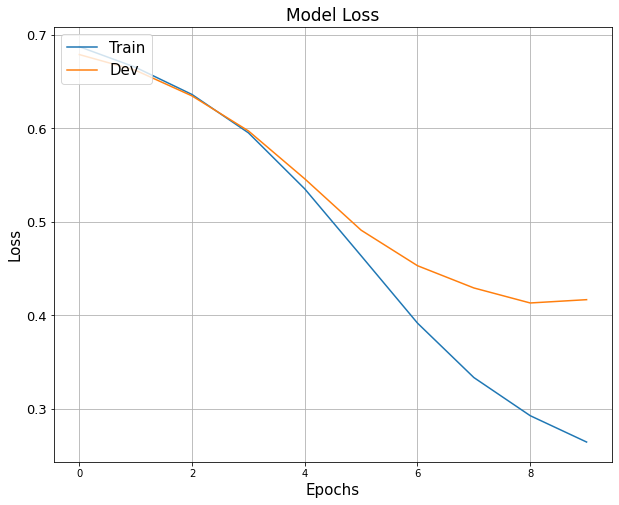

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#Learning Curves Loss-Epochs
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', fontsize=17)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.legend(['Train', 'Dev'], loc='upper left', fontsize = 15)
#plt.xticks(range(-1,6), range(7), fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
plt.show()

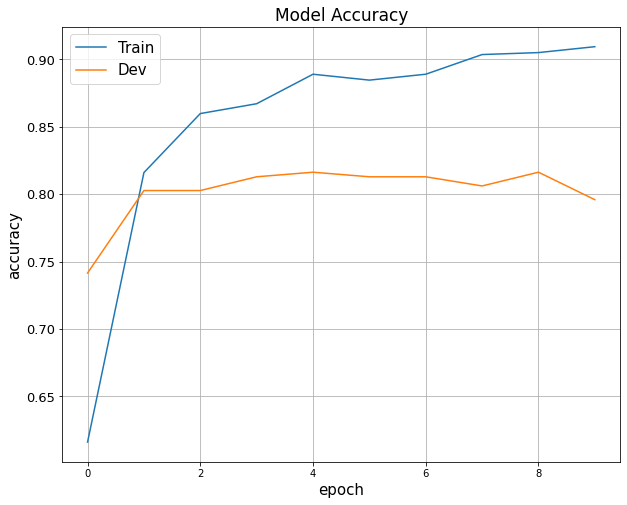

In [ ]:
#Learning Curves Loss-Epochs
plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=17)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(['Train', 'Dev'], loc='upper left', fontsize = 15)
#plt.xticks(range(-1,6), range(7), fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
plt.show()

>Classification Report for Train Set

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytrain, np.round(model.predict(xtrain_tfidf_svd1)).astype("int32"), labels=np.array([0,1])))


31/31 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       481
           1       0.91      0.85      0.88       498

    accuracy                           0.88       979
   macro avg       0.88      0.88      0.88       979
weighted avg       0.88      0.88      0.88       979



   Classification Report for *Test* Set

In [ ]:
print(classification_report(ytest, np.round(model.predict(xtest_tfidf_svd1)).astype("int32"), labels=np.array([0,1])))


19/19 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.84      0.87      0.86       295
           1       0.87      0.84      0.86       305

    accuracy                           0.86       600
   macro avg       0.86      0.86      0.86       600
weighted avg       0.86      0.86      0.86       600



Classification Report for Dev Set

In [ ]:
print(classification_report(ydev, np.round(model.predict(xdev_tfidf_svd1)).astype("int32"), labels=np.array([0,1])))

14/14 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.84      0.90      0.87       224
           1       0.88      0.81      0.84       197

    accuracy                           0.86       421
   macro avg       0.86      0.85      0.86       421
weighted avg       0.86      0.86      0.86       421



In [ ]:
probs_belong_to_class_1 = model.predict(xtrain_tfidf_svd1)
probs_belong_to_class_0 = 1-probs_belong_to_class_1
predict_proba_preds = np.concatenate((probs_belong_to_class_0, probs_belong_to_class_1), axis = 1)

print(f"\nPrecision Recall AUC score for the negative class:")
precision, recall, thresholds = precision_recall_curve(ytrain, predict_proba_preds[:,0],pos_label=0)
area_train_1 = auc(recall, precision)
print(area_train_1)

print(f"\nPrecision Recall AUC score for the positive class:")
precision, recall, thresholds = precision_recall_curve(ytrain, predict_proba_preds[:,1],pos_label=1)
area_train_2 = auc(recall, precision)
print(area_train_2)

print(f"\nMacro-averaged Precision Recall AUC score:")
print((area_train_1+area_train_2)/2)

31/31 [==============================] - 0s 5ms/step

Precision Recall AUC score for the negative class:
0.9574264403388145

Precision Recall AUC score for the positive class:
0.9556952846116394

Macro-averaged Precision Recall AUC score:
0.956560862475227


In [ ]:
probs_belong_to_class_1 = model.predict(xtest_tfidf_svd1)
probs_belong_to_class_0 = 1-probs_belong_to_class_1
predict_proba_preds = np.concatenate((probs_belong_to_class_0, probs_belong_to_class_1), axis = 1)

print(f"\nPrecision Recall AUC score for the negative class:")
precision, recall, thresholds = precision_recall_curve(ytest, predict_proba_preds[:,0],pos_label=0)
area_train_1 = auc(recall, precision)
print(area_train_1)

print(f"\nPrecision Recall AUC score for the positive class:")
precision, recall, thresholds = precision_recall_curve(ytest, predict_proba_preds[:,1],pos_label=1)
area_train_2 = auc(recall, precision)
print(area_train_2)

print(f"\nMacro-averaged Precision Recall AUC score:")
print((area_train_1+area_train_2)/2)

19/19 [==============================] - 0s 9ms/step

Precision Recall AUC score for the negative class:
0.9131270370894382

Precision Recall AUC score for the positive class:
0.9348307822802675

Macro-averaged Precision Recall AUC score:
0.9239789096848529


In [ ]:
probs_belong_to_class_1 = model.predict(xdev_tfidf_svd1)
probs_belong_to_class_0 = 1-probs_belong_to_class_1
predict_proba_preds = np.concatenate((probs_belong_to_class_0, probs_belong_to_class_1), axis = 1)


print(f"\nPrecision Recall AUC score for the negative class:")
precision, recall, thresholds = precision_recall_curve(ydev, predict_proba_preds[:,0],pos_label=0)
area_train_1 = auc(recall, precision)
print(area_train_1)

print(f"\nPrecision Recall AUC score for the positive class:")
precision, recall, thresholds = precision_recall_curve(ydev, predict_proba_preds[:,1],pos_label=1)
area_train_2 = auc(recall, precision)
print(area_train_2)

print(f"\nMacro-averaged Precision Recall AUC score:")
print((area_train_1+area_train_2)/2)

14/14 [==============================] - 0s 7ms/step

Precision Recall AUC score for the negative class:
0.9305683499659341

Precision Recall AUC score for the positive class:
0.9097931063565543

Macro-averaged Precision Recall AUC score:
0.9201807281612442


Batch size 8

In [ ]:
model = tuner.hypermodel.build(best_hps)
#print(model.summary())
checkpoint = tf.keras.callbacks.ModelCheckpoint('bestweights.hdf5',
                                                monitor='val_accuracy', 
                                                mode='max', 
                                                verbose=2, 
                                                save_best_only=True, 
                                                save_weights_only=True)



history = model.fit(xtrain_tfidf_svd1, ytrain, epochs=100, validation_split=0.3,batch_size=8,callbacks=[early_stopping,checkpoint])
eval_result = model.evaluate(xtest_tfidf_svd1, ytest)
print("[test loss, test accuracy]:", eval_result)

Epoch 1/100
84/86 [============================>.] - ETA: 0s - loss: 0.6875 - accuracy: 0.5551
Epoch 1: val_accuracy improved from -inf to 0.68707, saving model to bestweights.hdf5
86/86 [==============================] - 2s 10ms/step - loss: 0.6875 - accuracy: 0.5518 - val_loss: 0.6781 - val_accuracy: 0.6871
Epoch 2/100
83/86 [===========================>..] - ETA: 0s - loss: 0.6618 - accuracy: 0.8223
Epoch 2: val_accuracy improved from 0.68707 to 0.80952, saving model to bestweights.hdf5
86/86 [==============================] - 1s 8ms/step - loss: 0.6612 - accuracy: 0.8234 - val_loss: 0.6556 - val_accuracy: 0.8095
Epoch 3/100
86/86 [==============================] - ETA: 0s - loss: 0.6205 - accuracy: 0.8453
Epoch 3: val_accuracy improved from 0.80952 to 0.81633, saving model to bestweights.hdf5
86/86 [==============================] - 1s 9ms/step - loss: 0.6205 - accuracy: 0.8453 - val_loss: 0.6161 - val_accuracy: 0.8163
Epoch 4/100
82/86 [===========================>..] - ETA: 0s - 

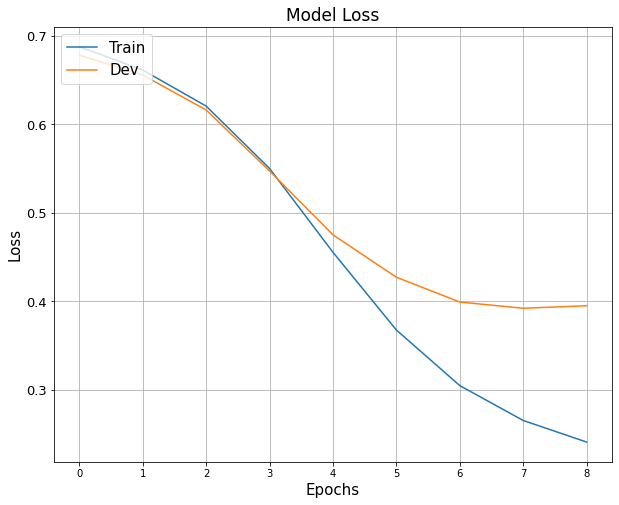

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#Learning Curves Loss-Epochs
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', fontsize=17)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.legend(['Train', 'Dev'], loc='upper left', fontsize = 15)
#plt.xticks(range(-1,6), range(7), fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
plt.show()

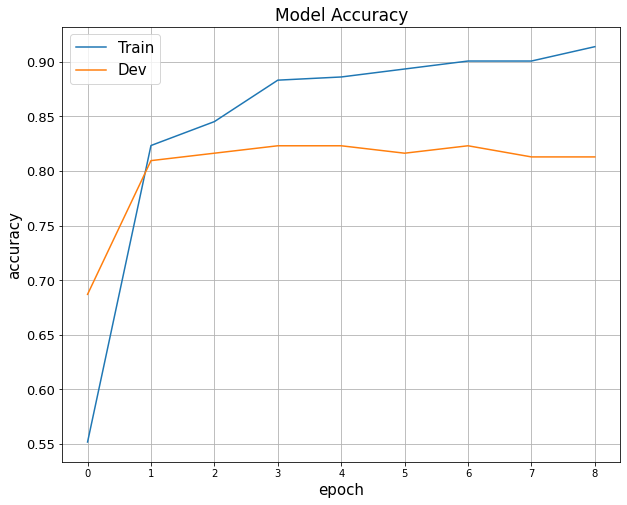

In [ ]:
#Learning Curves Loss-Epochs
plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=17)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(['Train', 'Dev'], loc='upper left', fontsize = 15)
#plt.xticks(range(-1,6), range(7), fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
plt.show()

>Classification Report for Train Set

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytrain, np.round(model.predict(xtrain_tfidf_svd1)).astype("int32"), labels=np.array([0,1])))


31/31 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       481
           1       0.89      0.89      0.89       498

    accuracy                           0.89       979
   macro avg       0.89      0.89      0.89       979
weighted avg       0.89      0.89      0.89       979



In [ ]:
print(classification_report(ytest, np.round(model.predict(xtest_tfidf_svd1)).astype("int32"), labels=np.array([0,1])))


19/19 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       295
           1       0.84      0.88      0.86       305

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



In [ ]:
print(classification_report(ydev, np.round(model.predict(xdev_tfidf_svd1)).astype("int32"), labels=np.array([0,1])))

14/14 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.86      0.85      0.86       224
           1       0.83      0.85      0.84       197

    accuracy                           0.85       421
   macro avg       0.85      0.85      0.85       421
weighted avg       0.85      0.85      0.85       421



Batch Size 16

In [ ]:
model = tuner.hypermodel.build(best_hps)
#print(model.summary())
checkpoint = tf.keras.callbacks.ModelCheckpoint('bestweights.hdf5',
                                                monitor='val_accuracy', 
                                                mode='max', 
                                                verbose=2, 
                                                save_best_only=True, 
                                                save_weights_only=True)



history = model.fit(xtrain_tfidf_svd1, ytrain, epochs=100, validation_split=0.3,batch_size=16,callbacks=[early_stopping,checkpoint])
eval_result = model.evaluate(xtest_tfidf_svd1, ytest)
print("[test loss, test accuracy]:", eval_result)

Epoch 1/100
41/43 [===========================>..] - ETA: 0s - loss: 0.6879 - accuracy: 0.5655
Epoch 1: val_accuracy improved from -inf to 0.65986, saving model to bestweights.hdf5
43/43 [==============================] - 2s 13ms/step - loss: 0.6876 - accuracy: 0.5664 - val_loss: 0.6829 - val_accuracy: 0.6599
Epoch 2/100
39/43 [==========================>...] - ETA: 0s - loss: 0.6716 - accuracy: 0.7853
Epoch 2: val_accuracy improved from 0.65986 to 0.77891, saving model to bestweights.hdf5
43/43 [==============================] - 0s 10ms/step - loss: 0.6705 - accuracy: 0.7883 - val_loss: 0.6697 - val_accuracy: 0.7789
Epoch 3/100
38/43 [=========================>....] - ETA: 0s - loss: 0.6509 - accuracy: 0.8470
Epoch 3: val_accuracy improved from 0.77891 to 0.80272, saving model to bestweights.hdf5
43/43 [==============================] - 0s 9ms/step - loss: 0.6500 - accuracy: 0.8482 - val_loss: 0.6516 - val_accuracy: 0.8027
Epoch 4/100
42/43 [============================>.] - ETA: 0s -

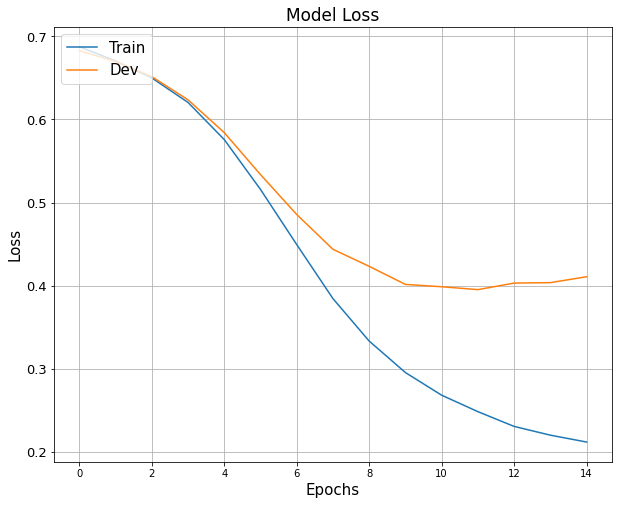

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#Learning Curves Loss-Epochs
plt.figure(figsize=(10,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss', fontsize=17)
plt.ylabel('Loss', fontsize=15)
plt.xlabel('Epochs', fontsize=15)
plt.legend(['Train', 'Dev'], loc='upper left', fontsize = 15)
#plt.xticks(range(-1,6), range(7), fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
plt.show()

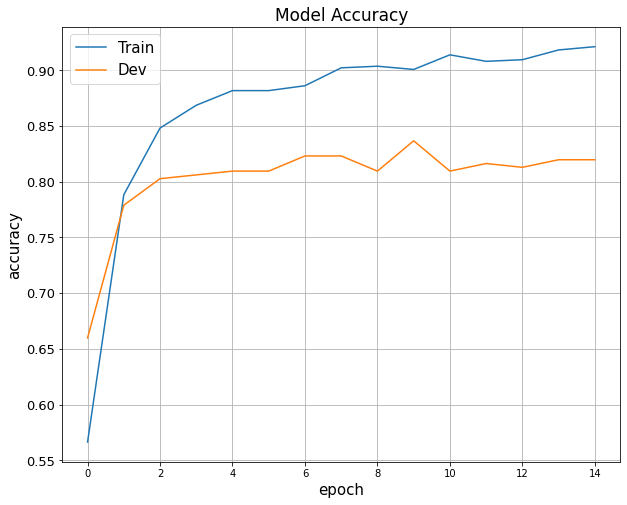

In [ ]:
#Learning Curves Loss-Epochs
plt.figure(figsize=(10,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy', fontsize=17)
plt.ylabel('accuracy', fontsize=15)
plt.xlabel('epoch', fontsize=15)
plt.legend(['Train', 'Dev'], loc='upper left', fontsize = 15)
#plt.xticks(range(-1,6), range(7), fontsize=13)
plt.yticks(fontsize=13)
plt.grid()
plt.show()

>Classification Report for Train Set

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(ytrain, np.round(model.predict(xtrain_tfidf_svd1)).astype("int32"), labels=np.array([0,1])))


31/31 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       481
           1       0.91      0.89      0.90       498

    accuracy                           0.90       979
   macro avg       0.90      0.90      0.90       979
weighted avg       0.90      0.90      0.90       979



In [ ]:
print(classification_report(ytest, np.round(model.predict(xtest_tfidf_svd1)).astype("int32"), labels=np.array([0,1])))


19/19 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       295
           1       0.84      0.86      0.85       305

    accuracy                           0.85       600
   macro avg       0.85      0.85      0.85       600
weighted avg       0.85      0.85      0.85       600



In [ ]:
print(classification_report(ydev, np.round(model.predict(xdev_tfidf_svd1)).astype("int32"), labels=np.array([0,1])))

14/14 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       224
           1       0.84      0.85      0.85       197

    accuracy                           0.86       421
   macro avg       0.85      0.85      0.85       421
weighted avg       0.86      0.86      0.86       421

